## Médias Móveis

Nessa aula vamos comparar média móvel simples e média móvel exponencial.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Vamos usar o dataset *airline_passengers* que informa o total de passageiros em milhares entre Janeiro de 1949 e Dezembro de 1960.

In [10]:
df = pd.read_csv('airline_passengers.csv' , index_col="Month" , parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Vamos eliminar as linhas com valores nulos.

In [11]:
print(len(df))
df.dropna(inplace=True)
print(len(df))


144
144


In [18]:
df['6-month-MMS'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-MMS'] = df['Thousands of Passengers'].rolling(window=12).mean()
#df.dropna(inplace=True)



## Média Móvel Simples (MMS)

Nós já vimos na Aula 03 como criar uma MMS fazendo rolagem (*rolling*) e usando a função *mean*. Para relembrar, vamos gerar médias móveis usando janelas de 6 e 12 meses.


<Axes: xlabel='Month'>

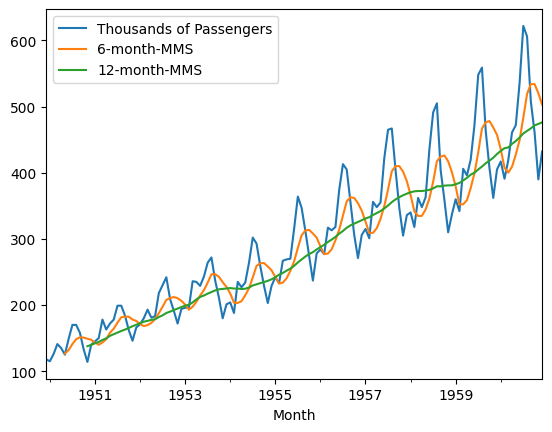

In [19]:
df.head(15)
df.plot()

## Média Móvel Exponencial (MMS)

Acabamos de ver como calcular a MMS com base em alguma janela. A MMS tem alguns pontos fracos:
* Janelas menores gerarão mais ruído, em vez de sinal
* Sempre ficará atrasado de acordo com o tamanho da janela
* Nunca atingirá o pico ou vale total dos dados devido à média.
* Na verdade, não informa sobre possíveis comportamentos futuros, o que realmente faz é descrever tendências em seus dados. Portanto, seu uso não é indicado para previsão.
* Valores históricos extremos podem distorcer significativamente a MMS (pandemia, recessão, etc.).

Para corrigir esses problemas, usamos a Média Móvel Exponencial - MME (em inglês:  <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>)

A MME nos permitirá reduzir o efeito de atraso (lag effect) da MMS e dará mais importância aos valores que ocorreram mais recentemente (aplicando mais peso aos valores mais recentes, daí o nome). A quantidade de peso aplicada aos valores mais recentes dependerá dos parâmetros reais usados ​​na MME e do número de períodos de acordo com o tamanho da janela.

Para uma explicação detalhada a respeito da MME, consulte: http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows.

A seguir, daremos uma explicação simplificada sobre a MME.

A fórumula da MME é:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$



Onde $x_t$ é o valor de entrada, $w_i$ é o peso aplicado (Note como o peso pode variar de $i=0$ até $t$), e $y_t$ é a saída produzida.

A pergunda fundamental é: como definir o peso aplicado $w_i$?

Isso depende do parâmetro de ajuste (*adjust*) que deve ser fornecido para o método *ewm()*.

Quando *adjust=True*, as médias ponderadas são calculadas usando pesos iguais a 
$w_i = (1 - \alpha)^i$

que resulta em

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}$

Quando adjust=False é especificado, médias móveis são calculadas da seguinte forma:

$y_0 = x_0$ 

$y_t = (1 - \alpha) y_{t-1} + \alpha x_t$

o que equivale usando pesos a:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{se } i < t \\
    (1 - \alpha)^i        & \text{se } i = t.
\end{cases}\end{split}

Quando *adjust=True* temos $y_0=x_0$ e, da última representação acima, temos $y_t=\alpha x_t+(1−α)y_{t−1}$. Dessa forma, presumimos que $x_0$ não é um valor comum, mas sim um momento exponencialmente ponderado da série infinita até aquele ponto.

Para o fator de suavização $\alpha$ devemos ter $0<\alpha≤1$, e apesar de ser possível passar *alpha* diretamente, geralmente é mais fácil pensar no *período*, no *centro de massa* ou na *meia vida* de um momento exponencial:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{para o período}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{para o centro de massa}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{para a meia vida}\ h > 0
 \end{cases}\end{split}

* Período (span) corresponde ao que comumente é chamado de "N-day EW moving average".
* Centro de massa tem uma interpretação mais física e pode ser entendida como span: $c=(s−1)/2$.
* Meia vida é o período de tempo necessário para que o o peso exponencial reduza à metade.
* Alpha especifica o fator de suavização diretamente.

Temos que passar um dos parâmentros acima para a função *.ewm()*. Para os nosso dados, usaremos *span=12*.

In [21]:
df['MME12'] = df['Thousands of Passengers'].ewm(span=12 , adjust=False).mean()
df.head(20)

,Thousands of Passengers,6-month-MMS,12-month-MMS,MME12
Month,,,,
1949-12-01,118,NaN,NaN,118.000000
1950-01-01,115,NaN,NaN,117.538462
1950-02-01,126,NaN,NaN,118.840237
1950-03-01,141,NaN,NaN,122.249431
1950-04-01,135,NaN,NaN,124.211057
1950-05-01,125,126.666667,NaN,124.332433
1950-06-01,149,131.833333,NaN,128.127443
1950-07-01,170,141.000000,NaN,134.569375
1950-08-01,170,148.333333,NaN,140.020240


<Axes: xlabel='Month'>

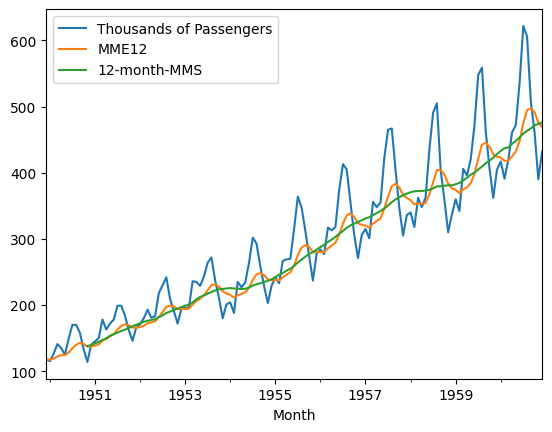

In [25]:
df[["Thousands of Passengers" , "MME12" , "12-month-MMS"]].plot()


## Comparando MMS com MME

## Suavização Exponencial Simples

O exemplo acima empregou <em>Suavização Exponencial Simples</em> com um fator de suavização <strong>α</strong>. Infelizmente, esta técnica é incapaz de fazer boas previsões quando há uma tendência nos dados, como visto acima. Na próxima aula veremos <em>Suavização Exponencial Dupla</em> e <em>Suavização Exponencial Tripla</em> com os Métodos Holt-Winters.

